### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [136]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [138]:
#Replace empty cells with NaN for uniformity
data = data.replace(r'', np.nan, regex=True)


In [ ]:
data['Bar'] = data['Bar'].str.replace('~','_to_')
data['Bar'] = data['Bar'].str.replace('less1','less_than_1')
data['Bar'] = data['Bar'].str.replace('gt8','greater_than_8')
data['CoffeeHouse'] = data['CoffeeHouse'].str.replace('~','_to_')
data['CoffeeHouse'] = data['CoffeeHouse'].str.replace('less1','less_than_1')
data['CoffeeHouse'] = data['CoffeeHouse'].str.replace('gt8','greater_than_8')
data['CarryAway'] = data['CarryAway'].str.replace('~','_to_')
data['CarryAway'] = data['CarryAway'].str.replace('less1','less_than_1')
data['CarryAway'] = data['CarryAway'].str.replace('gt8','greater_than_8')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace('~','_to_')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace('less1','less_than_1')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace('gt8','greater_than_8')
data['Restaurant20To50'] = data['Restaurant20To50'].str.replace('~','_to_')
data['Restaurant20To50'] = data['Restaurant20To50'].str.replace('less1','less_than_1')
data['Restaurant20To50'] = data['Restaurant20To50'].str.replace('gt8','greater_than_8')
data['destination'] = data['destination'].str.replace('No Urgent Place','No_Urgent_Place')
data['age'] = data['age'].str.replace('21','21to25')
data['age'] = data['age'].str.replace('26','26to30')
data['age'] = data['age'].str.replace('31','31to35')
data['age'] = data['age'].str.replace('36','36to40')
data['age'] = data['age'].str.replace('41','41to45')
data['age'] = data['age'].str.replace('46','46to50')

In [ ]:
#'Below21' was also changed in the age column to 'Below21to25' per the above command so changing it back to'Below21'
data['age'] = data['age'].str.replace('below21to25','below21')


4. What proportion of the total observations chose to accept the coupon? 



In [148]:
#Total proportion of observations that chose to accept the coupon = Number that accepted coupon/total number of observations
ans = (data['Y']==1).sum()/data.shape[0]
print ("Proportion of the total observations that chose to accept the coupon:", round(ans,2))


Proportion of the total observations that chose to accept the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

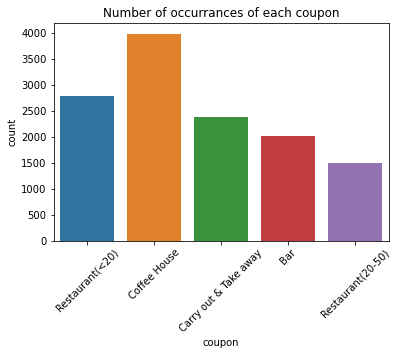

In [221]:
#Count the number of occurances for each coupon
sns.countplot(data = data, x = 'coupon').set(title = 'Number of occurrances of each coupon')
plt.xticks(rotation = 45)

6. Use a histogram to visualize the temperature column.

(array([20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

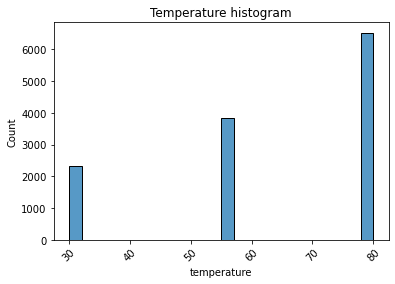

In [222]:
sns.histplot(data = data, x = 'temperature').set(title = 'Temperature histogram')
plt.xticks(rotation = 45)

In [149]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No_Urgent_Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21to25,Unmarried partner,...,never,NaN,4_to_8,1_to_3,1,0,0,0,1,1
1,No_Urgent_Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21to25,Unmarried partner,...,never,NaN,4_to_8,1_to_3,1,0,0,0,1,0
2,No_Urgent_Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21to25,Unmarried partner,...,never,NaN,4_to_8,1_to_3,1,1,0,0,1,1
3,No_Urgent_Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21to25,Unmarried partner,...,never,NaN,4_to_8,1_to_3,1,1,0,0,1,0
4,No_Urgent_Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21to25,Unmarried partner,...,never,NaN,4_to_8,1_to_3,1,1,0,0,1,0
5,No_Urgent_Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21to25,Unmarried partner,...,never,NaN,4_to_8,1_to_3,1,1,0,0,1,1
6,No_Urgent_Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21to25,Unmarried partner,...,never,NaN,4_to_8,1_to_3,1,1,0,0,1,1
7,No_Urgent_Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21to25,Unmarried partner,...,never,NaN,4_to_8,1_to_3,1,1,0,0,1,1
8,No_Urgent_Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21to25,Unmarried partner,...,never,NaN,4_to_8,1_to_3,1,1,0,0,1,1
9,No_Urgent_Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21to25,Unmarried partner,...,never,NaN,4_to_8,1_to_3,1,1,0,0,1,0


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [306]:
df= data[data['coupon']=='Bar']


2. What proportion of bar coupons were accepted?


In [310]:
df_bar_accept = data[(data['coupon']=='Bar') & (data['Y']==1)]

#Number of customers that accepted bar coupons/total number of bar coupons

ans2 = df_bar_accept.shape[0]/df.shape[0]*100
print ("Percentage of bar coupons accepted is: ", round(ans2,2), "%")


Percentage of bar coupons accepted is:  41.0 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [393]:
#Those who went to a bar more than 3 times a month = 4_to_8 and greater_than_8
#Those who went to a bar 3 or fewer times a month = never, 1_to_3 and less_than_1


df_3ormore = df[(df['Bar']=='4_to_8') | (df['Bar']=='greater_than_8')]

df_3ormore_accept = df[(df['Y']==1) & ((df['Bar']=='4_to_8') | (df['Bar']=='greater_than_8'))]


df_lessthan3 = df[(df['Bar']=='1_to_3') | (df['Bar']=='less_than_1')|(df['Bar']=='never')]

df_lessthan3_accept = df[(df['Y']==1) & ((df['Bar']=='1_to_3') | (df['Bar']=='less_than_1')|(df['Bar']=='never'))]


ans3 = df_3ormore_accept.shape[0]/df_3ormore.shape[0]*100
ans4 = df_lessthan3_accept.shape[0]/df_lessthan3.shape[0]*100
print ("Acceptance rate of those who went to bar 3 times or fewer a month is:", round(ans4,2),"%", ", those who went more is:", round(ans3,2),"%")

#Acceptance rate who went to a bar more than 3 times a month is higher than those that went fewer times as expected

Acceptance rate of those who went to bar 3 times or fewer a month is: 37.06 % , those who went more is: 76.88 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [406]:
#Acceptance rate between drivers who drivers who go to a bar more than once a month fall into these categories: 1_to_3, 4_to_8 and greater_than_8 and over the age of 25 (not in the age groups of below 21 and 21 to 25)


df3a = df[((df['Bar']=='1_to_3') | (df['Bar']=='4_to_8')|(df['Bar']=='greater_than_8')) & (df['age'].isin(['26to30','31to35','36to40','41to45','46to50','50plus']))]

df3 = df3a[df3a['Y']==1]


ans4a = df3.shape[0]/df3a.shape[0]*100

ans4b_all = df.shape[0] - df3a.shape[0]
ans4b_accept = df[df['Y']==1].shape[0] - df3.shape[0] 
ans4b_ratio = ans4b_accept/ans4b_all*100

print ("Acceptance rate comparison -  Drivers who go more than once a month to bar and over the age of 25:",round(ans4a,2),"%","vs others: ",round(ans4b_ratio,2),"%")
# Acceptance rate of drivers who go more than once a month and over the age of 25 is higher than those that do not fall in this subset

Acceptance rate comparison -  Drivers who go more than once a month to bar and over the age of 25: 69.52 % vs others:  33.5 %


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [157]:
df5a = df[((df['Bar']=='1_to_3') | (df['Bar']=='4_to_8')|(df['Bar']=='greater_than_8')) & (~df['passanger'].isin(['Kid(s)'])) & (~df['occupation'].isin(['Farming Fishing & Forestry']))]

df5 = df[(df['Y']==1) & ((df['Bar']=='1_to_3') | (df['Bar']=='4_to_8')|(df['Bar']=='greater_than_8')) & (~df['passanger'].isin(['Kid(s)'])) & (~df['occupation'].isin(['Farming Fishing & Forestry']))]

ans5a = df5.shape[0]/df5a.shape[0]*100

ans5b_all = df.shape[0] - df5a.shape[0]
ans5b_accept = df[df['Y']==1].shape[0] - df5.shape[0] 
ans5b_ratio = ans5b_accept/ans5b_all*100
print ("Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is:", round(ans5a,2), "%")
print ("Acceptance rate for the rest is:", round(ans5b_ratio,2), "%")

#Acceptance rate of drivers who go to bars more than once a month, without kids as a passenger and do not purse farming, forestry as a profession is higher

Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is: 71.32 %
Acceptance rate for the rest is: 29.6 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [401]:
#Acceptance rates for drivers who fall into any of the categories above

x = ((df['Bar']=='1_to_3') | (df['Bar']=='4_to_8')|(df['Bar']=='greater_than_8')) & (~df['passanger'].isin(['Kid(s)'])) & (~df['maritalStatus'].isin(['Widowed']))

y =  ((df['Bar']=='1_to_3') | (df['Bar']=='4_to_8')|(df['Bar']=='greater_than_8')) & (df['age'].isin(['below21','21to25','26to30']))

z= ((df['RestaurantLessThan20']=='4_to_8') | (df['RestaurantLessThan20']=='greater_than_8')) & (df['income'].isin(['Less than $12500', '$12500 - 24999', '$25000 - $37499', '$37500 - $49999']))

all_df = df[x | y | z]
all_df_accept = df[ (x | y | z) & df['Y']==1]
ans6 = all_df_accept.shape[0]/all_df.shape[0]*100
print ("The acceptance rate of those who fall into any of the categories in Question 6:",round(ans6,2),"%")


The acceptance rate of those who fall into any of the categories in Question 6: 60.97 %


In [407]:
#Acceptance rates for drivers who do NOT fall into any of the categories above

x = ((df['Bar']=='1_to_3') | (df['Bar']=='4_to_8')|(df['Bar']=='greater_than_8')) & (~df['passanger'].isin(['Kid(s)'])) & (~df['maritalStatus'].isin(['Widowed']))

y =  ((df['Bar']=='1_to_3') | (df['Bar']=='4_to_8')|(df['Bar']=='greater_than_8')) & (df['age'].isin(['below21','21to25','26to30']))

z= ((df['RestaurantLessThan20']=='4_to_8') | (df['RestaurantLessThan20']=='greater_than_8')) & (df['income'].isin(['Less than $12500', '$12500 - 24999', '$25000 - $37499', '$37500 - $49999']))

all_df_1 = df[~x | ~y | ~z]
all_df_accept_1 = df[ (~x | ~y | ~z) & df['Y']==1]
ans7 = all_df_accept_1.shape[0]/all_df_1.shape[0]*100
print ("The acceptance rate of those who do not fall into any of the categories in Question 6:",round(ans7,2),"%")



The acceptance rate of those who do not fall into any of the categories in Question 6: 39.42 %


[Text(0.5, 1.0, 'Proportion of Bar coupons accepted in each age group')]

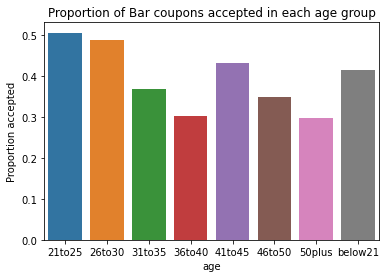

In [405]:
#Proportion that accepted Bar coupons in each age group
df_all_ages = df.groupby(['age']).count().reset_index()
df_accept_all_ages = df.groupby(['age']).sum().reset_index()
df_accept_all_ages ['Proportion accepted'] = df_accept_all_ages['Y']/df_all_ages['Y']
sns.barplot(data = df_accept_all_ages, x = 'age', y ='Proportion accepted').set(title = "Proportion of Bar coupons accepted in each age group")

#Highest acceptance of bar coupons from 21to25 and lowest from 50plus

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

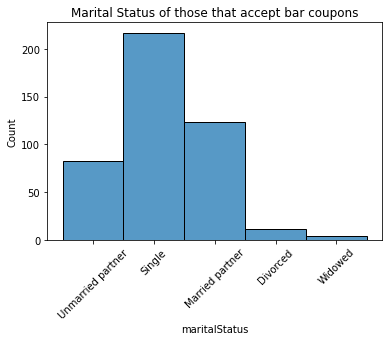

In [408]:
sns.histplot(data = all_df_accept, x ='maritalStatus').set(title = "Marital Status of those that accept bar coupons")
plt.xticks(rotation =45)
#From the histogram plot of the maritalStatus, majority of the drivers were single or married. Widowed had the least count 


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#Drivers who accepted coupons are likely in the following description:
#1. Those who go more than 3 times a month more likely to accept than those that go fewer times
#2. Ages upto 30 are more likely to accept the coupon than other age groups
#3. Those who go more than once a month and are over the age of 25 are more likely to accept the coupon. Amongst these, most liley are those who do have a kid as a passengar and those that are not in farming and forestry
#4. Those who went more than once a month were under age 30, passanger not a kid and were not widowed or those who went more than 4 times a month that had income less than $50000 were more likely to accept the coupons



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [427]:
#Proportion of customers that accepted the coupon for Restaurant(20to50)
new_df= data[data['coupon']=='Restaurant(20-50)']
new_df_accept = new_df[new_df['Y']==1]
new_ans1 = (new_df['Y']==1).sum()/new_df.shape[0]*100
print ("Proportion of customers accepting coupons for Restaurant(20-50):", round(new_ans1,2),"%")


Proportion of customers accepting coupons for Restaurant(20-50): 44.1 %


[Text(0.5, 1.0, 'Proportion of Restaurant(20-50) coupons accepted in each age group')]

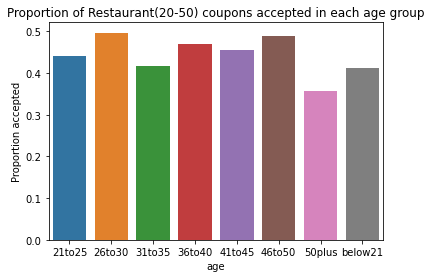

In [410]:
newdf_all_ages = new_df.groupby(['age']).count().reset_index()
newdf_accept_all_ages = new_df_accept.groupby(['age']).sum().reset_index()
newdf_accept_all_ages ['Proportion accepted'] = newdf_accept_all_ages['Y']/newdf_all_ages['Y']
sns.barplot(data = newdf_accept_all_ages, x = 'age', y ='Proportion accepted').set(title = "Proportion of Restaurant(20-50) coupons accepted in each age group")

#Acceptance rate does not differ much between age groups

[Text(0.5, 1.0, 'Proportion of Restaurant(20-50) coupons accepted in each frequency of visit')]

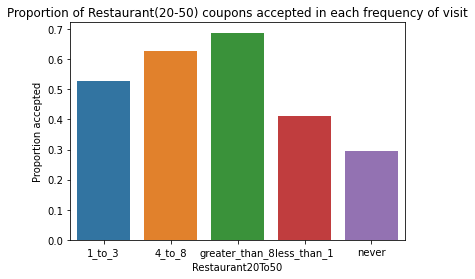

In [400]:
newdf_all_freq = new_df.groupby(['Restaurant20To50']).count().reset_index()
newdf_accept_all_freq = new_df_accept.groupby(['Restaurant20To50']).sum().reset_index()
newdf_accept_all_freq ['Proportion accepted'] = newdf_accept_all_freq['Y']/newdf_all_freq['Y']
sns.barplot(data = newdf_accept_all_freq, x = 'Restaurant20To50', y ='Proportion accepted').set(title = "Proportion of Restaurant(20-50) coupons accepted in each frequency of visit")

#Drivers who visited over 4 times a month were more likely to accept the coupon

[Text(0.5, 1.0, 'Number of drivers that accepted coupons by visiting frequency')]

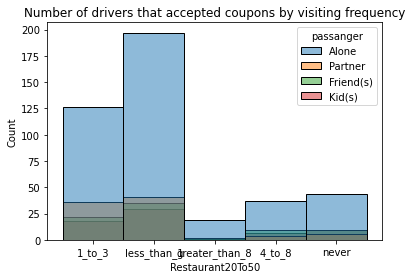

In [364]:
sns.histplot(data = new_df_accept, x = 'Restaurant20To50', hue = 'passanger').set(title = 'Number of drivers that accepted coupons by visiting frequency')

#Those who accepted expensive restaurant coupons were driving alone or with a married partner when frequenting less than 3 times a month. 


[Text(0.5, 1.0, 'Number of customers that accepted coupons for Restaurant20-50 by gender')]

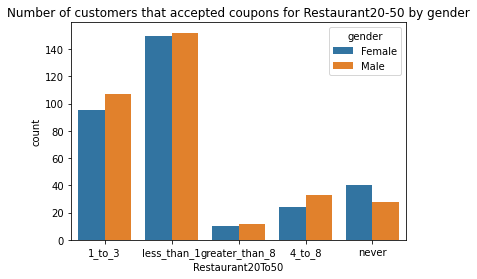

In [419]:
sns.countplot(data = new_df_accept, x = 'Restaurant20To50', hue = 'gender').set(title = "Number of customers that accepted coupons for Restaurant20-50 by gender")

#No gender differences in terms of who accepted the coupon in any of the frequencies

In [434]:
#Acceptance rate of those who accepted Restaurant20-50 coupons that visit less than 3 times a month and traveling alone or with a partner
#Compare acceptance rate to the rest
new_df1 = df[((df['Restaurant20To50']=='never')| (df['Restaurant20To50']=='less_than_1') | (df['Restaurant20To50']=='1_to_3')) & ((df['passanger']=='Partner')|(df['passanger']=='Alone') )]

new_df1a = new_df1[new_df1['Y']==1]
acceptance_rate = new_df1a.shape[0]/new_df1.shape[0]*100

rest = new_df.shape[0]-new_df1.shape[0]
rest_accept= new_df_accept.shape[0]-new_df1a.shape[0]
rest_proportion = rest_accept/rest*100
print("Acceptance rate for the customers that visit less than 3 times a month and either drive alone or with a partner is:", round(acceptance_rate,2),"%","and for the rest is:", round(rest_proportion,2),"%")

Acceptance rate for the customers that visit less than 3 times a month and either drive alone or with a partner is: 38.79 % and for the rest is: 95.04 %


In [ ]:
#Proportion of customers accepting Restaurant(20-50) coupon is 44%
#Acceptance rate does not differ much between age groups although most 
#Drivers who visited over 4 times a month were more likely to accept the coupon
#No gender dependence on coupon acceptance for restaurant20-50
#Acceptance rate for those that went less than 3 times a month and drove alone or with a partner is lower than the rest - which is at 95%!